### Part - 1

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import warnings

warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [172]:
dataset = load_boston()

X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [173]:
Y = pd.DataFrame(dataset.target, columns=['target'])
Y


,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [174]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, train_size=0.8)

In [175]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


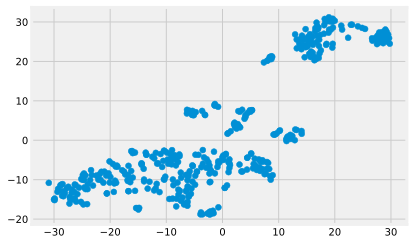

In [176]:
model = TSNE(n_components=2, learning_rate=250, random_state=42)
tsne_result = model.fit_transform(X_train_scaled)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.show()

### Part - 2


In [177]:
kms = KMeans(n_clusters=3, random_state=42, max_iter=100)
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
kms.fit(X_train[feature_names])

X_train['cluster'] = kms.labels_
X_train['price'] = Y_train


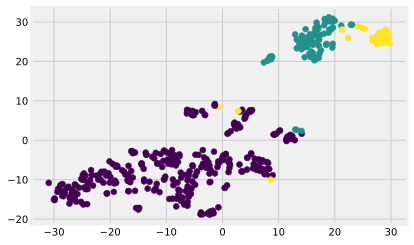

In [178]:
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kms.labels_)
plt.show()

In [179]:
for i in np.unique(kms.labels_):
    average_price = np.average(X_train[X_train.cluster == i]['price'])
    average_crim = np.average(X_train[X_train.cluster == i]['CRIM'])

    print(f'Cluster {i}:')
    print(f'  Average price {average_price}')
    print(f'  Average CRIM {average_crim}')
    print('')


Cluster 0:
  Average price 25.16868686868687
  Average CRIM 0.40486282828282827

Cluster 1:
  Average price 17.442105263157895
  Average CRIM 11.745661842105262

Cluster 2:
  Average price 13.196774193548388
  Average CRIM 14.360380322580646

